In [1]:
## Bring in the important stuff!

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os
import xarray as xr

from netCDF4 import Dataset
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from pandas import Timestamp
from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords, extract_times, ALL_TIMES, interplevel
from glob import glob

mpl.use('Agg')
%matplotlib inline

/glade/u/apps/ch/opt/pythonpkgs/2.7/xarray/0.9.5/intel/16.0.3/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime
/glade/u/apps/ch/opt/pythonpkgs/2.7/matplotlib/2.0.2/gnu/6.3.0/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
## Bring in wrfout data as 'filenames'
## based on ensemble member

path = '/glade/work/jpiers/WRFV3/run' # set path to where wrfout files are located
filenames0 = sorted(glob(path+'/wrfout_10_2/wrfout_d0*')) # define filenames, sorted by time
filenames1 = sorted(glob(path+'/wrfout_10_1/wrfout_d0*'))
filenames2 = sorted(glob(path+'/wrfout_8_2/wrfout_d0*'))
filenames3 = sorted(glob(path+'/wrfout_8_1/wrfout_d0*'))
filenames4 = sorted(glob(path+'/wrfout_17_2/wrfout_d0*'))
filenames5 = sorted(glob(path+'/wrfout_17_1/wrfout_d0*'))



In [3]:
## Create lists 'files' and 'times' that will be used for making plots
## Print times - for diagnostic purposes

    
files0=[]
times0=[]

for file in filenames0:
    files0.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times0.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))

files1=[]
times1=[]
    
for file in filenames1:
    files1.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times1.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))
    
files2=[]
times2=[]

for file in filenames2:
    files2.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times2.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))
    
files3=[]
times3=[]

for file in filenames3:
    files3.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times3.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))
    
files4=[]
times4=[]

for file in filenames4:
    files4.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times4.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))
    
files5=[]
times5=[]

for file in filenames5:
    files5.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times5.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))

2016-12-25_00:00:00
2016-12-25_01:00:00
2016-12-25_02:00:00
2016-12-25_03:00:00
2016-12-25_04:00:00
2016-12-25_05:00:00
2016-12-25_06:00:00
2016-12-25_07:00:00
2016-12-25_08:00:00
2016-12-25_09:00:00
2016-12-25_10:00:00
2016-12-25_11:00:00
2016-12-25_12:00:00
2016-12-25_13:00:00
2016-12-25_14:00:00
2016-12-25_15:00:00
2016-12-25_16:00:00
2016-12-25_17:00:00
2016-12-25_18:00:00
2016-12-25_19:00:00
2016-12-25_20:00:00
2016-12-25_21:00:00
2016-12-25_22:00:00
2016-12-25_23:00:00
2016-12-26_00:00:00
2016-12-26_01:00:00
2016-12-26_02:00:00
2016-12-26_03:00:00
2016-12-26_04:00:00
2016-12-26_05:00:00
2016-12-26_06:00:00
2016-12-26_07:00:00
2016-12-26_08:00:00
2016-12-26_09:00:00
2016-12-26_10:00:00
2016-12-26_11:00:00
2016-12-26_12:00:00
2016-12-26_13:00:00
2016-12-26_14:00:00
2016-12-26_15:00:00
2016-12-26_16:00:00
2016-12-26_17:00:00
2016-12-26_18:00:00
2016-12-26_19:00:00
2016-12-26_20:00:00
2016-12-26_21:00:00
2016-12-26_22:00:00
2016-12-26_23:00:00
2016-12-27_00:00:00
2016-12-27_01:00:00


In [ ]:
## all ensembles; refl_10cm geq 40 dbz

variable = "REFL_10CM"
threshold = 40
threshold_counts = np.zeros((len(files0), 6), dtype=int)
for w, wrf_obj_list in enumerate([files0, files1, files2, files3, files4, files5]):
    for t in range(len(wrf_obj_list)):
        #print(w, t)
        threshold_counts[t, w] = np.count_nonzero(wrf_obj_list[t].variables[variable][0].max(axis=0) >= threshold)

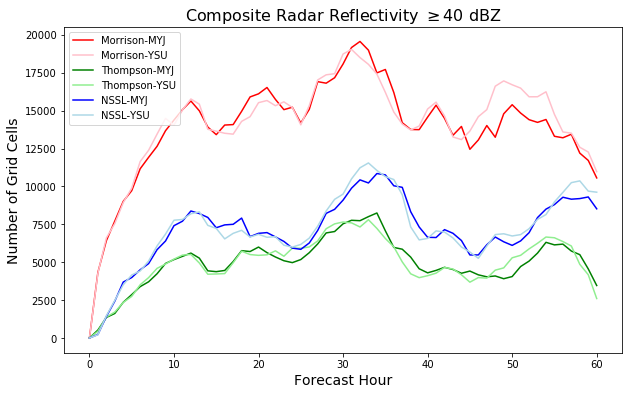

In [22]:
## all ensembles, refl_10cm geq 40 dbz, color

count_columns = ["Morrison-MYJ", "Morrison-YSU", "Thompson-MYJ", "Thompson-YSU", "NSSL-MYJ", "NSSL-YSU"]
colors = ["red", "pink", "green", "lightgreen", "blue", "lightblue"]
plt.figure(figsize=(10, 6))
for c in range(threshold_counts.shape[1]):
    plt.plot(np.arange(61), threshold_counts[:, c], label=count_columns[c], color=colors[c])
plt.legend(loc=0)
plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("Number of Grid Cells", fontsize=14)
plt.title("Composite Radar Reflectivity $\geq$"+str(threshold)+" dBZ", fontsize=16)


outpath = 'DEC16_images/thresholds'
plt.savefig(outpath+'/'+variable+'_'+str(threshold)+'_all_color_.png', bbox_inches="tight", dpi=200)

In [16]:
# REFL_10CM threshold 45 dbz; only MYJ

variable = "REFL_10CM"
threshold = 45
threshold_counts = np.zeros((len(files0), 3), dtype=int)
for w, wrf_obj_list in enumerate([files0, files2, files4]):
    for t in range(len(wrf_obj_list)):
        #print(w, t)
        threshold_counts[t, w] = np.count_nonzero(wrf_obj_list[t].variables[variable][0].max(axis=0) >= threshold)

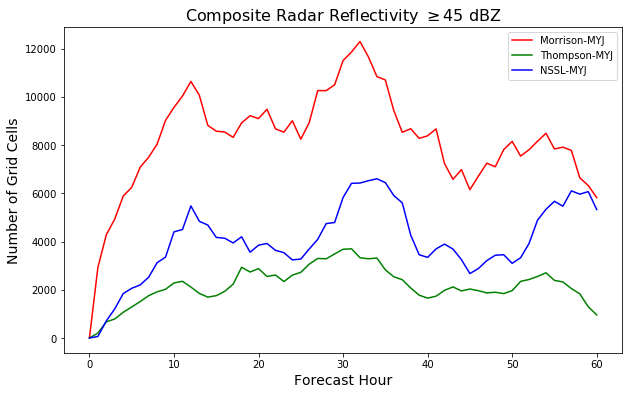

In [17]:
## REFL_10CM threshold 45 dbz; only MYJ; color

count_columns = ["Morrison-MYJ", "Thompson-MYJ", "NSSL-MYJ"]
colors = ["red", "green", "blue",]
plt.figure(figsize=(10, 6))
for c in range(threshold_counts.shape[1]):
    plt.plot(np.arange(61), threshold_counts[:, c], label=count_columns[c], color=colors[c])
plt.legend(loc=0)
plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("Number of Grid Cells", fontsize=14)
plt.title("Composite Radar Reflectivity $\geq$"+str(threshold)+" dBZ", fontsize=16)


outpath = 'DEC16_images/thresholds'
plt.savefig(outpath+'/'+variable+'_'+str(threshold)+'_myj_color_.png', bbox_inches="tight", dpi=200)

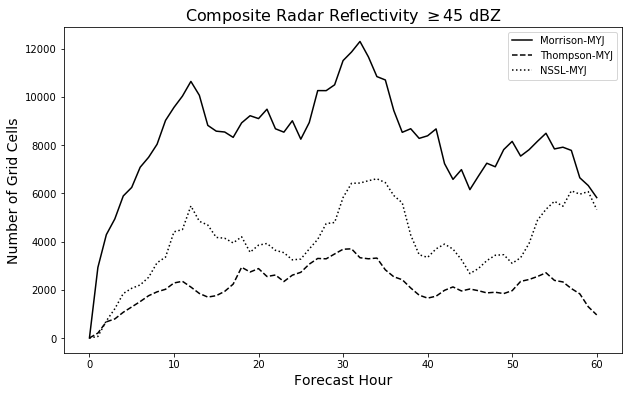

In [6]:
## REFL_10CM threshold 45 dbz; only MYJ; black/white

count_columns = ["Morrison-MYJ", "Thompson-MYJ", "NSSL-MYJ"]
linestyle = ["-", "--", ":",]
plt.figure(figsize=(10, 6))
for c in range(threshold_counts.shape[1]):
    plt.plot(np.arange(61), threshold_counts[:, c], label=count_columns[c], linestyle=linestyle[c], color = 'black')
plt.legend(loc=0)
plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("Number of Grid Cells", fontsize=14)
plt.title("Composite Radar Reflectivity $\geq$"+str(threshold)+" dBZ", fontsize=16)


outpath = 'DEC16_images/thresholds'
plt.savefig(outpath+'/'+variable+'_'+str(threshold)+'_myj_black_.png', bbox_inches="tight", dpi=200)

In [7]:
# REFL_10CM threshold 55 dbz; only MYJ

variable = "REFL_10CM"
threshold = 55
threshold_counts = np.zeros((len(files0), 3), dtype=int)
for w, wrf_obj_list in enumerate([files0, files2, files4]):
    for t in range(len(wrf_obj_list)):
        #print(w, t)
        threshold_counts[t, w] = np.count_nonzero(wrf_obj_list[t].variables[variable][0].max(axis=0) >= threshold)

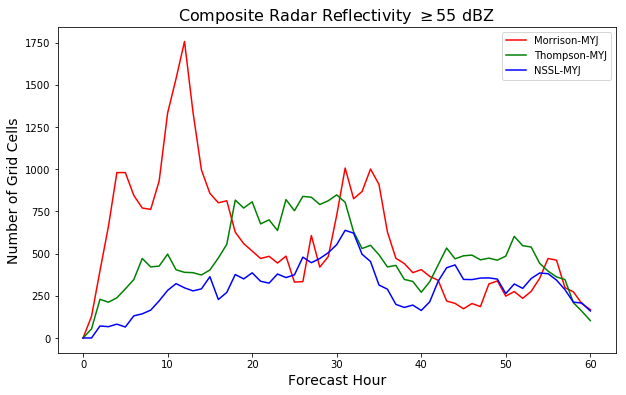

In [8]:
## REFL_10CM threshold 55 dbz; only MYJ; color

count_columns = ["Morrison-MYJ", "Thompson-MYJ", "NSSL-MYJ"]
colors = ["red", "green", "blue",]
plt.figure(figsize=(10, 6))
for c in range(threshold_counts.shape[1]):
    plt.plot(np.arange(61), threshold_counts[:, c], label=count_columns[c], color=colors[c])
plt.legend(loc=0)
plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("Number of Grid Cells", fontsize=14)
plt.title("Composite Radar Reflectivity $\geq$"+str(threshold)+" dBZ", fontsize=16)


outpath = 'DEC16_images/thresholds'
plt.savefig(outpath+'/'+variable+'_'+str(threshold)+'_myj_color_.png', bbox_inches="tight", dpi=200)

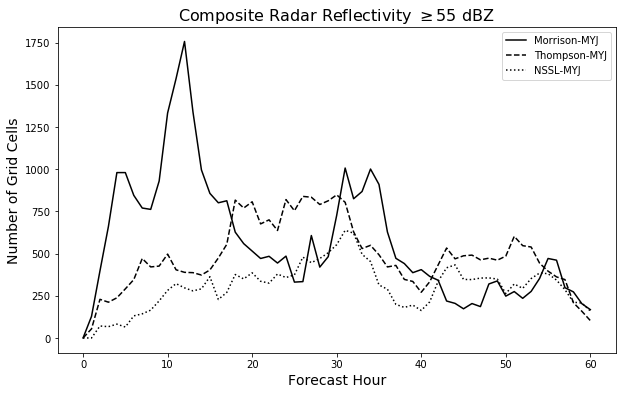

In [9]:
## REFL_10CM threshold 55 dbz; only MYJ; black/white

count_columns = ["Morrison-MYJ", "Thompson-MYJ", "NSSL-MYJ"]
linestyle = ["-", "--", ":",]
plt.figure(figsize=(10, 6))
for c in range(threshold_counts.shape[1]):
    plt.plot(np.arange(61), threshold_counts[:, c], label=count_columns[c], linestyle=linestyle[c], color = 'black')
plt.legend(loc=0)
plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("Number of Grid Cells", fontsize=14)
plt.title("Composite Radar Reflectivity $\geq$"+str(threshold)+" dBZ", fontsize=16)


outpath = 'DEC16_images/thresholds'
plt.savefig(outpath+'/'+variable+'_'+str(threshold)+'_myj_black_.png', bbox_inches="tight", dpi=200)

In [13]:
# REFL_10CM threshold 65 dbz; only MYJ

variable = "REFL_10CM"
threshold = 65
threshold_counts = np.zeros((len(files0), 3), dtype=int)
for w, wrf_obj_list in enumerate([files0, files2, files4]):
    for t in range(len(wrf_obj_list)):
        #print(w, t)
        threshold_counts[t, w] = np.count_nonzero(wrf_obj_list[t].variables[variable][0].max(axis=0) >= threshold)

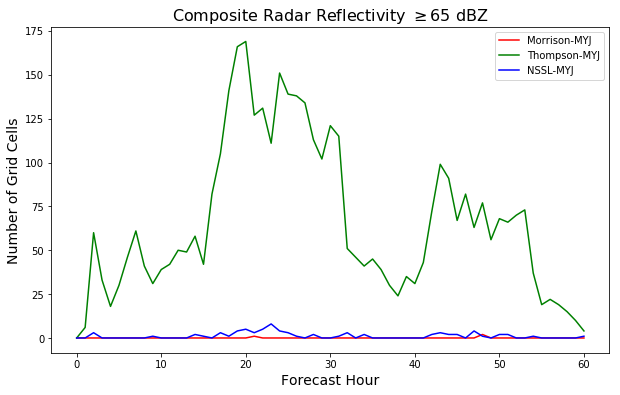

In [14]:
## REFL_10CM threshold 65 dbz; only MYJ; color

count_columns = ["Morrison-MYJ", "Thompson-MYJ", "NSSL-MYJ"]
colors = ["red", "green", "blue",]
plt.figure(figsize=(10, 6))
for c in range(threshold_counts.shape[1]):
    plt.plot(np.arange(61), threshold_counts[:, c], label=count_columns[c], color=colors[c])
plt.legend(loc=0)
plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("Number of Grid Cells", fontsize=14)
plt.title("Composite Radar Reflectivity $\geq$"+str(threshold)+" dBZ", fontsize=16)


outpath = 'DEC16_images/thresholds'
plt.savefig(outpath+'/'+variable+'_'+str(threshold)+'_myj_color_.png', bbox_inches="tight", dpi=200)

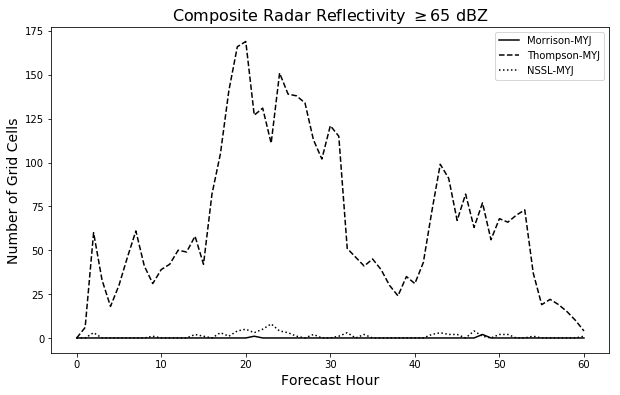

In [15]:
## REFL_10CM threshold 65 dbz; only MYJ; black/white

count_columns = ["Morrison-MYJ", "Thompson-MYJ", "NSSL-MYJ"]
linestyle = ["-", "--", ":",]
plt.figure(figsize=(10, 6))
for c in range(threshold_counts.shape[1]):
    plt.plot(np.arange(61), threshold_counts[:, c], label=count_columns[c], linestyle=linestyle[c], color = 'black')
plt.legend(loc=0)
plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("Number of Grid Cells", fontsize=14)
plt.title("Composite Radar Reflectivity $\geq$"+str(threshold)+" dBZ", fontsize=16)


outpath = 'DEC16_images/thresholds'
plt.savefig(outpath+'/'+variable+'_'+str(threshold)+'_myj_black_.png', bbox_inches="tight", dpi=200)

In [36]:
# REFL_10CM threshold 70 dbz; only MYJ

variable = "REFL_10CM"
threshold = 70
threshold_counts = np.zeros((len(files0), 3), dtype=int)
for w, wrf_obj_list in enumerate([files0, files2, files4]):
    for t in range(len(wrf_obj_list)):
        #print(w, t)
        threshold_counts[t, w] = np.count_nonzero(wrf_obj_list[t].variables[variable][0].max(axis=0) >= threshold)

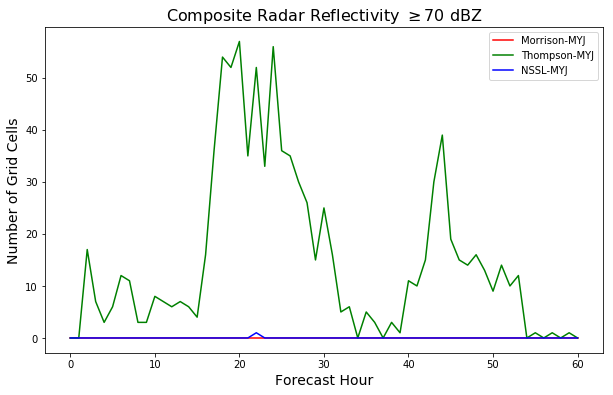

In [37]:
## REFL_10CM threshold 70 dbz; only MYJ; color

count_columns = ["Morrison-MYJ", "Thompson-MYJ", "NSSL-MYJ"]
colors = ["red", "green", "blue",]
plt.figure(figsize=(10, 6))
for c in range(threshold_counts.shape[1]):
    plt.plot(np.arange(61), threshold_counts[:, c], label=count_columns[c], color=colors[c])
plt.legend(loc=0)
plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("Number of Grid Cells", fontsize=14)
plt.title("Composite Radar Reflectivity $\geq$"+str(threshold)+" dBZ", fontsize=16)


outpath = 'DEC16_images/thresholds'
plt.savefig(outpath+'/'+variable+'_'+str(threshold)+'_myj_color_.png', bbox_inches="tight", dpi=200)